# Homework 7 (Due 5/29)

## Name:

## ID:

## Instructions
Run everything (select cell in the menu, and click Run all), export as pdf, and submit the pdf to gradescope. 

To export as pdf, you can use the following methods: (1) File -> download as -> pdf (2) print as pdf from browser.

**Q1**

In Q1 and Q2, we show that the multiclass logistic regression is a generalization of the binary logistic regression. The notations follow the [lecture on multiclass logistic regression](../notes/classification_multi.ipynb) and the [lecture on binary logistic regression](../notes/classification.ipynb).

Suppose $x\in \mathbb{R}^p$ and we do have the intercept term.

For binary logistic regression, we assume the probability of $x$ belonging to class 1 is 

$$p(x) = \frac{1}{1+e^{-\beta^T x}}$$

and the probability of $x$ belonging to class 2 is

$$1-p(x) = \frac{e^{-\beta^T x}}{1+e^{-\beta^T x}}$$

where $\beta \in \mathbb{R}^p$ is the weight vector.


For multiclass logistic regression, suppose $K=2$, the predicted probability of class 1 and class 2 are given by

$$f_1(x) = \frac{e^{{w_1}^T x}}{e^{{w_1}^T x} + e^{{w_2}^T x}}$$

$$f_2(x) = \frac{e^{{w_2}^T x}}{e^{{w_1}^T x} + e^{{w_2}^T x}}$$

where $w_1, w_2 \in \mathbb{R}^d$ are the weight vectors.


Show that when $\beta = w_1 - w_2$, the predicted probability of class 1 and class 2 in the multiclass logistic regression is the same as the binary logistic regression.


$$f_1(x) = \frac{e^{{w_1}^T x}}{e^{{w_1}^T x} + e^{{w_2}^T x}} = \frac{1}{1+e^{(w_2-w_1)^T x}} = \frac{1}{1+e^{-\beta^T x}} = p(x)$$

$$f_2(x) = 1 - f_1(x) = \frac{e^{-\beta^T x}}{1+e^{-\beta^T x}} = 1-p(x)$$


**Q2**

Let $y_{ik}$ be the indicator function for class $k$ for the $i$-th sample for $i$=1,...,n and $k$=1,...,K. That is, $y_{ik}=1$ if the $i$-th sample belongs to class $k$ and $y_{ik}=0$ otherwise.

For multiclass logistic regression, the cross entropy loss is given by

$$L = -\sum_{i=1}^n \sum_{k=1}^K y_{ik} \log f_k(x_i)$$

When $K=2$, use results from **Q1**, show that this is the same as the binary cross-entropy loss

Hint: use the fact that $y_{i1} + y_{i2} = 1$


$$L = -\sum_{i=1}^n y_{i1} \log f_1(x_i) + y_{i2} \log f_2(x_i) = \sum_{i=1}^n - y_{i1} \log f_1(x_i) -
 (1-y_{i1}) \log (1-f_1(x_i))$$

which is the binary cross-entropy loss.

In the following problems, we will use the penguins dataset.

We will use ``[bill_length_mm, bill_depth_mm]`` as the features to predict the species of penguins.

We will explore different classifiers.

In [67]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
features = ['bill_length_mm', 'bill_depth_mm']
label = 'species'
df.dropna(subset=features + [label], inplace=True)

# scale the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
X = df[features]

# # encode the species to 1, 2, 3
# encoder = LabelEncoder()
# y = encoder.fit_transform(df.species)
y = df[label]

**Q3**

Use the multiclass logistic regression model

(1) Fit a logistic regression model to predict the species.

(2) Report the accuracy of the model.

(3) Visualize the decision boundary.

Accuracy: 0.9649122807017544


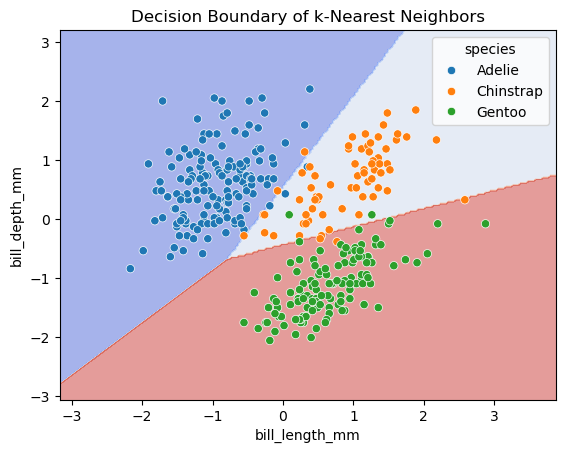

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Create a logistic regression classifier with multinomial option for multi-class
clf = LogisticRegression(multi_class='multinomial', penalty=None)
clf.fit(X, y)

accuracy = clf.score(X, y)
print(f"Accuracy: {accuracy}")

# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)

sns.scatterplot(data=df, x=features[0], y=features[1], hue='species')
plt.title('Decision Boundary of k-Nearest Neighbors')
plt.show()

**Q4**

Use the kNN classifier.

Using 5-fold cross validation, find the k that gives the best accuracy.


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Try different values of k for kNN
k_values = range(1, 31)  # Test k from 1 to 30
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    mean_scores.append(scores.mean())

# Find the best k value with the highest cross-validated accuracy
best_k = k_values[mean_scores.index(max(mean_scores))]
best_score = max(mean_scores)

print("Best k:", best_k)
print("Best cross-validated accuracy:", best_score)



Best k: 4
Best cross-validated accuracy: 0.9648763853367435


**Q5**

Given the optimal $k$ value from Q4, perform the following tasks:
    
(1) Fit a kNN classifier to predict the species.

(2) Report the accuracy of the model.

(3) Visualize the decision boundary.


Accuracy: 0.9649122807017544


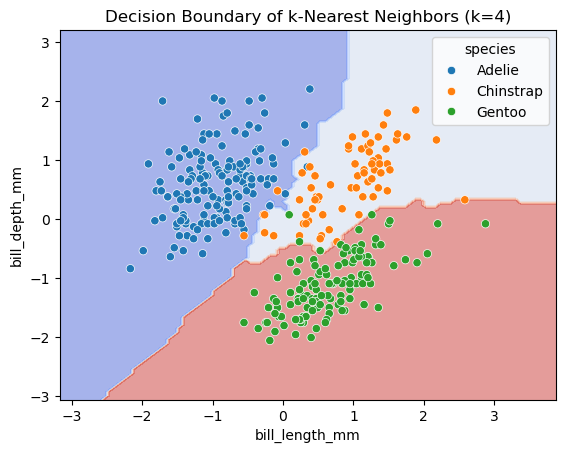

In [78]:
# Initialize and fit the KNeighborsClassifier
k = 4  # Assuming k=3 is the optimal k found from Q4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

y_pred = knn.predict(X)
accuracy = knn.score(X, y)
print(f"Accuracy: {accuracy}")

# Visualize the decision boundary
db_display = DecisionBoundaryDisplay.from_estimator(
    knn,
    X,
    cmap='coolwarm',
    response_method='predict',
    xlabel=features[0],
    ylabel=features[1],
    alpha=0.5
)
sns.scatterplot(data=df, x=features[0], y=features[1], hue='species')
plt.title(f'Decision Boundary of k-Nearest Neighbors (k={k})')
plt.show()